In [1]:
from langchain_huggingface import HuggingFaceEndpointEmbeddings
from dotenv import load_dotenv
load_dotenv()   

True

In [ ]:
#Load embeddings from sentence-transformers model, task = "feature-extraction" is needed
embed = HuggingFaceEndpointEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2",
task="feature-extraction")

In [4]:
prompt = "Agentic AI agents can plan, reason and use tools"
result = embed.embed_query(prompt)

In [5]:
print("Original text:", prompt)
print("Embedding vector:", result)
print("Length of embedding vector:", len(result))
print("Type of embedding vector:", type(result))
print("First 5 elements of embedding vector:", result[:5])

Original text: Agentic AI agents can plan, reason and use tools
Embedding vector: [-0.04476454481482506, -0.001985077979043126, -0.05032221972942352, -0.010781580582261086, 0.07039131969213486, -0.01646873727440834, 0.027106497436761856, 0.015612082555890083, -0.00640355097129941, 0.05658220127224922, -0.02872193604707718, -0.02763022482395172, 0.02272270806133747, 0.04701746255159378, 0.07116739451885223, 0.00033264289959333837, 0.042590025812387466, 0.01120392233133316, -0.08442937582731247, -0.05860108137130737, 0.02936709113419056, 0.01564069092273712, -0.05615178868174553, -0.04191844165325165, -0.07365187257528305, 0.02836885303258896, 0.05104052275419235, -0.04616517946124077, 0.022519003599882126, -0.00941561907529831, 0.07421810925006866, 0.0786527693271637, 0.015886589884757996, -0.011322475969791412, 0.041811320930719376, 0.0691874548792839, -0.06444897502660751, 0.038020167499780655, 0.0676145926117897, -0.01335822232067585, -0.056411873549222946, -0.03536306694149971, -0.0

In [6]:
sentences = [
    "AI is amazing.",
    "Artificial Intelligence is amazing.",
    "AI is 🔥."
]
 
for s in sentences:
    t = embed.embed_query(s)
    print(f"Text: {s}\nTokens: {len(t)} → {t}\n")

Text: AI is amazing.
Tokens: 384 → [-0.03328040614724159, -0.07583870738744736, 0.03228871524333954, -0.038003109395504, 0.0008073505596257746, -0.0005421271780505776, 0.028998037800192833, 0.028514418751001358, 0.016367409378290176, 0.03842974454164505, -0.053600702434778214, 0.04331149533390999, 0.04654373601078987, -0.01668582670390606, -0.053697504103183746, 0.004250184167176485, 0.0678289383649826, -0.06613082438707352, -0.07102783024311066, -0.09720972180366516, -0.010995390824973583, 0.00175267003942281, 0.0631990134716034, -0.04950994998216629, -0.005791661329567432, 0.08564957231283188, 0.021389923989772797, -0.06900826841592789, 0.018361935392022133, -0.06856822222471237, -0.0026979451067745686, 0.03003447689116001, 0.03959033638238907, 0.000664709834381938, -0.14709940552711487, 0.061802368611097336, -0.016505131497979164, -0.04925823211669922, 0.025710465386509895, -0.041272081434726715, -0.0013431556290015578, -0.0156632699072361, 0.054405391216278076, -0.08052346855401993

In [7]:
texts = [
    "Agentic AI", "Autonomous Agents", "Bananas are yellow"
]

embeddinds = []
for text in texts:
    embedding = embed.embed_query(text)
    embeddinds.append(embedding)
    print(f"Text: {text}\nTokens: {len(embedding)} → {embedding}\n")

Text: Agentic AI
Tokens: 384 → [-0.04398762062191963, -0.023310711607336998, -0.0306059829890728, -0.03859078139066696, 0.052213236689567566, -0.0015792252961546183, 0.10309536755084991, -0.02114740200340748, 0.018867896869778633, 0.06238440424203873, -0.0162504892796278, -0.028512563556432724, 0.04199319705367088, 0.024876872077584267, -0.004636402241885662, 0.029402347281575203, 0.01742449589073658, 0.05064719170331955, -0.09079187363386154, -0.041925374418497086, 0.0046981158666312695, 0.03363367170095444, -0.02962062694132328, -0.044258683919906616, -0.062393948435783386, 0.047277286648750305, 0.006459421012550592, -0.02116836979985237, -0.011720966547727585, -0.07456555217504501, 0.06705322116613388, 0.055191829800605774, 0.07585037499666214, -0.018279975280165672, -0.004111444111913443, 0.03443552926182747, -0.1169198602437973, -0.009138147346675396, 0.06259734183549881, 0.03551387041807175, -0.032307304441928864, -0.05288195237517357, -0.017515944316983223, -0.07413407415151596,

Matplotlib is building the font cache; this may take a moment.


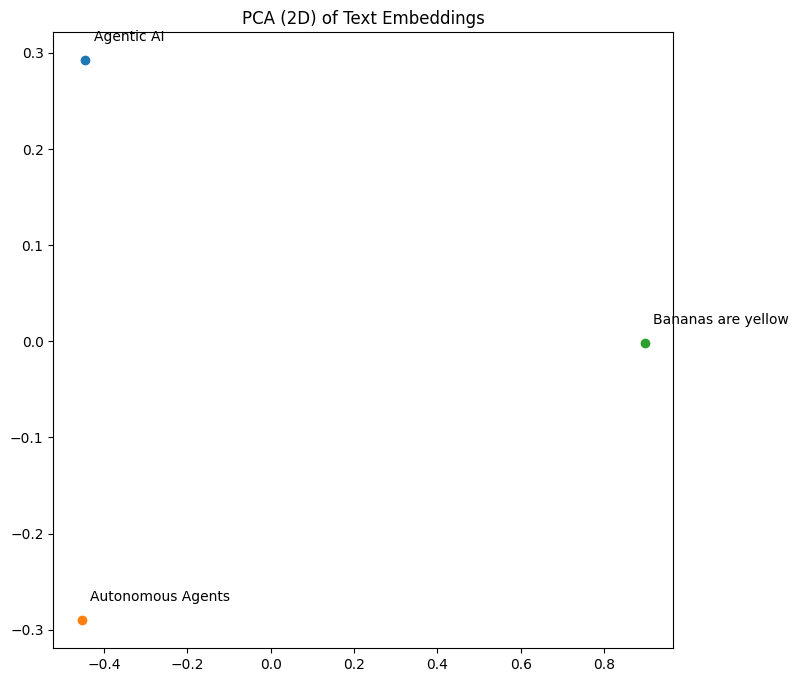

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
points = pca.fit_transform(embeddinds)

plt.figure(figsize=(8, 8))
for i, txt in enumerate(texts):
    plt.scatter(points[i, 0], points[i, 1])
    plt.text(points[i, 0]+0.02, points[i, 1]+0.02, txt)

plt.title("PCA (2D) of Text Embeddings")
plt.show()

In [9]:
points


array([[-0.44466317,  0.29227399],
       [-0.45396804, -0.29026337],
       [ 0.89863121, -0.00201063]])

In [ ]:
#Compare similarity between embeddings
from sklearn.metrics.pairwise import cosine_similarity
 
sim = cosine_similarity([embeddinds[1]], embeddinds)
print("Similarity scores:", sim)

Similarity scores: [[0.83028183 1.         0.04369288]]
